# Context : Data Stream, the Computational Complexity project

In this project we want to respond to a simple problematic : 

*   write an algorithm that give the **100 maximum numbers** of a very large stream of number (> 100&nbsp;000)
*   with the **smallest memory cost** possible (<1 KiB)
*   with the **lowest algorithmic complexity** possible

Another constraint : **No external libraries** (but you can recode any algorithm you want )

---

**This deliverable** is a Jupyter Notebook composed of several parts :
 - Presentation and codes of your algorithm(s)
 - Check : result validity
 - Check : memory complexity curves
 - Challenge : time complexity curves 

# Presentation of your algorithm(s) and their codes




## Algorithm #1 (simple)



### Idea developped

Let's try 3 option:
The first one is to sorted all the value of the list and then to take the 100 last value 

The second option is to delete the maximum value that we found with the function filtermaxbylinesimple and then repeat it 100 time

The third option is to create 100 cases and to compare with the 100 value 

*Please evoque HERE what you tried to do*

In [332]:
def find_minimum(array):
 minimum=array[0]
 ipetit=0
 for i in range(len(array)):
   if int(array[i])<int(minimum):
     minimum=array[i]
     ipetit=i
 return ipetit

def les_cents(array):
 liste=[]
 for i in range(100):
    liste.append(array.readline(100))
 return liste




### Code

In [333]:
#This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineSimple(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      liste_cent=les_cents(f) 
      line = f.readline() # Loading the first line
      minimum=find_minimum(liste_cent)
      while line: # While there is new line to be real
      
         #minimum=find_minimum(liste_cent)
        value = int(line) # String to int conversion
        if first or int(liste_cent[minimum])< int(value): # Seeking maximum value
          liste_cent[minimum]=value
          minimum=find_minimum(liste_cent)
          first=False 
        line = f.readline() # Loading the next line
            
      
    return liste_cent # Printing the maximum value



## Algorithm #2 (optimised ? optional !)



### Idea developped

*Please evoque HERE what you tried to do*

### Code

In [334]:
#This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineOptimized(filename):
 with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      liste_cent=list(map(int,les_cents(f)))
 
      line = f.readline() # Loading the first line
      minimum=min(liste_cent)
      print(minimum)
      while line: # While there is new line to be real
         #minimum=find_minimum(liste_cent)
        value = int(line) # String to int conversion
        if first or int(liste_cent[liste_cent.index(minimum)])< int(value): # Seeking maximum value
          liste_cent[liste_cent.index(minimum)]=value
          minimum=min(liste_cent)
          first=False 
        line = f.readline() # Loading the next line
            
      
    return liste_cent # Printing the maximum value



# Prerequisite to the profiling

In [335]:
%pip install pprofile
%pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Generate the data files online :

In [336]:
import sys
import numpy as np

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}

np.random.seed(42) # Common seed for comparison between every participants

for filename, dataSize in filelist.items():
    f= open(filename,"w")
    for i in range(0,dataSize):
	    f.write("%d\n" % np.random.randint(-sys.maxsize-1,sys.maxsize,dtype=np.int64))
    f.close

In [337]:
# prints all files
print(os.listdir("./"))

['A_dixmille.txt', 'B_centmille.txt', 'Computation_Complexity_Project _ Data Stream Template_P2023 (1).ipynb', 'Computation_Complexity_Project _ Data Stream Template_P2023.ipynb', 'C_cinqcentmille.txt', 'D_unmillion.txt']


#Check : Result validity

Getting the verification data by cheating

In [338]:
def cheaterFunction(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      array = sorted(map(int, f.readlines()), reverse=True) # Loading the whole file, convert it to integers and sort it
      return array[0:100]

resultCheck={}
for filename,dataSize in filelist.items():
  resultCheck[filename] = cheaterFunction(filename)

Actual verification of your code

In [339]:
for filename,dataSize in filelist.items():
  resultSimple = filterMaxByLineSimple(filename)
  resultSimple.sort(reverse=True)
  if (resultCheck[filename] != resultSimple):
    print("Invalid result for the simple algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultSimple)
    break
  else:
    print("Simple algorithm with", filename, ": OK")



Simple algorithm with A_dixmille.txt : OK
Simple algorithm with B_centmille.txt : OK
Simple algorithm with C_cinqcentmille.txt : OK
Simple algorithm with D_unmillion.txt : OK


In [340]:
for filename,dataSize in filelist.items():
  resultOptimized = filterMaxByLineOptimized(filename)
  resultOptimized.sort(reverse=True)
  if (resultCheck[filename] != resultOptimized):
    print("Invalid result for the optimized algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultOptimized)
    break
  else:
    print("Optimized algorithm with", filename, ": OK")


-9121506858621027266
Optimized algorithm with A_dixmille.txt : OK
-9205975967497735130
Optimized algorithm with B_centmille.txt : OK
-8921071141306726232
Optimized algorithm with C_cinqcentmille.txt : OK
-9185746711559732939
Optimized algorithm with D_unmillion.txt : OK


# Check : Memory complexity curves

In [341]:
from memory_profiler import memory_usage #Import the library

sizeList=[]
mcostListSimple=[]
mcostListOptimized=[]
mcostListThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)
  mem_during_execution = memory_usage((filterMaxByLineSimple,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListSimple.append(memory_increment)
  mem_during_execution = memory_usage((filterMaxByLineOptimized,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListOptimized.append(memory_increment)
  mcostListThreshold.append(0.001)

print(sizeList)
print(mcostListSimple)
print(mcostListOptimized)





-9121506858621027266
-9121506858621027266
-9121506858621027266
-9121506858621027266
-9205975967497735130
-9205975967497735130
-8921071141306726232
-9185746711559732939
[10000, 100000, 500000, 1000000]
[0.0, 0.0, 0.00390625, 0.0]
[0.0078125, 0.01953125, 0.0, 0.0]


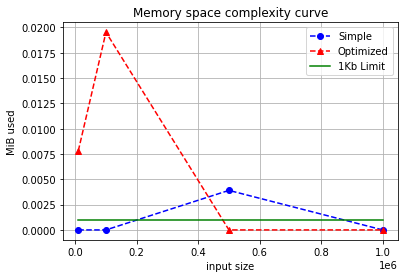

In [342]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, mcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, mcostListOptimized,'--r^', label="Optimized")
ax.plot(sizeList, mcostListThreshold,'-g', label="1Kb Limit")

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your curve should stay below the limit**

# Challenge : time complexity curves 

In [343]:
import pprofile
import pstats
import numpy as np

sizeList=[]
tcostListSimple=[]
tcostListOptimized=[]
tcostListCorrectThreshold=[]
tcostListGoodThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineSimple, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListSimple.append(timingFile.getTotalHitCount())

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineOptimized, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListOptimized.append(timingFile.getTotalHitCount())

  tcostListCorrectThreshold.append(7.1*dataSize)
  tcostListGoodThreshold.append(5.1*dataSize)

print(sizeList)
print(tcostListSimple)
print(tcostListOptimized)

-9121506858621027266
-9205975967497735130
-8921071141306726232
-9185746711559732939
[10000, 100000, 500000, 1000000]
[139505, 552027, 2187455, 4193373]
[41201, 401930, 2002425, 4000797]


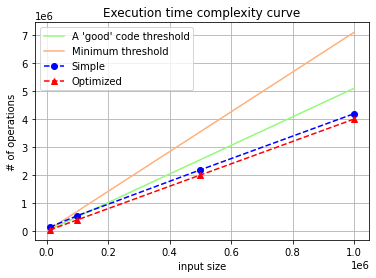

In [344]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, tcostListGoodThreshold,'-', color='xkcd:light green', label="A 'good' code threshold")
ax.plot(sizeList, tcostListCorrectThreshold,'-', color='xkcd:peach', label="Minimum threshold")
ax.plot(sizeList, tcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, tcostListOptimized,'--r^', label="Optimized")

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your code should not be above the orange curve and the closest possible to the green one (or below ?)**

(Obviously, you need to pass the two previous tests also. Not doing the task will always be quicker :-) )

# Bonus : What is the best/worst cases of your algorithms

Explain HERE what are the best/worst cases of your algorithms